# **TP1 - Variable Types & Descriptive Statistics**

<b>Exploratory Data Analysis & Unsuperivsed Learning </b><br>
**Course: PHAUK Sokkey, PhD** <br> 
**TP: HAS Sothea, PhD**

-------

**Objective**: This initial practical session is designed to enhance your understanding of various data variable types and the corresponding statistical and graphical tools suitable for each type.

---------

> **The `Jupyter Notebook` for this TP can be downloaded here: [TP1-Gapminder](https://hassothea.github.io/EDA_ITC/TPs/TP1_Variable_Types_Descriptive_Statistics.ipynb)**.

-------

# 1. `Gapminder` dataset

[`Gapminder`](https://pypi.org/project/gapminder/) is an excerpt of data available at [https://gapminder.org](https://www.gapminder.org/). For each of $142$ countries (`country`), the package provides values for life expectancy (`lifeExp`), GDP per capita (`gdpPercap`), and population (`pop`), every five years, from $1952$ to $2007$ (`year`). It is initially used in [Jennifer Bryan's excellent `gapminder` teaching package for R](https://github.com/jennybc/gapminder/) ([`ggplot`](https://ggplot2.tidyverse.org/), [`tidyverse`](https://www.tidyverse.org/), and more). For more information about `gapminder`: 
- Documentation: [https://www.gapminder.org/data/documentation/](https://www.gapminder.org/data/documentation/)
- A short demonstration video is available here: [Hans Rosling's 200 Countries, 200 Years, 4 Minutes - The Joy of Stats - BBC Four](https://youtu.be/jbkSRLYSojo?si=qipg08VIi999hEgo).

In [48]:
#%pip install gapminder           # This is for installing the package
from gapminder import gapminder
print(f"* Number of observations: {gapminder.shape[0]}")
gapminder.sample(3)

* Number of observations: 1704


,country,continent,year,lifeExp,pop,gdpPercap
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906
306,Colombia,Americas,1982,66.653,27764644,4397.575659
1,Afghanistan,Asia,1957,30.332,9240934,820.853030


----------

# 2. Variable types

`EDA` involves summarizing and visualizing data to uncover patterns, detect anomalies, and understand relationships between variables. Statistical summaries, such as mean, median, and standard deviation, are essential tools in this process.

- Which variables are considered quantitative and which are qualitative? 

> Hint: You can check the default column types by using `gapminder.dtypes`.

> Response:

- Quantitative: `year`, `lifeExp`, `pop` and `gdpPercap`.
- Qualitative: `continent` and `country`.

## 2.1 Quantitative variables

1. In year 2002, 
- Compute suitable statistics for each quantitative variable (excluding `year`) to obtain an overall summary.
- Recall the definitions of Pearson's second coefficient of **skewness** and **kurtosis** introduced in the course. Compute these metrics for each quantitative variable and explain the distribution of each variable based on these values.

In [49]:
import numpy as np

# Define data for 2002
year = 2002
df2002 = gapminder[gapminder.year == year]
df2002.describe().drop(columns='year').transpose().drop(columns=['count', '25%', '75%'])

,mean,std,min,50%,max
lifeExp,6.569492e+01,1.227982e+01,39.193000,7.082550e+01,8.200000e+01
pop,4.145759e+07,1.408483e+08,170372.000000,1.037292e+07,1.280400e+09
gdpPercap,9.917848e+03,1.115411e+04,241.165876,5.319805e+03,4.468398e+04


> **Note**: At this step, you can have overall view of how different in scale all variables may be. Notice where is the mean and what is the range of each variable. For example: In 2002, among 142 countries, a newborn in the healthiest nation could expect to live beyond 80 years, while in the unhealthiest, a newborn's life expectancy was no more than 40 years. The average life expectancy across these countries was nearly 66 years. Notably, the median life expectancy was higher than the average, indicating that the majority of these countries had life expectancies well above the average.

- Pearson's second coefficient of **skewness** is defined by:
$$\text{Skewness}=\frac{3(\text{mean}-\text{median})}{\sigma},$$
and it measures the symmetry of the distribution of the data.

- **Kurtosis** is defined by:
$$\text{Kurt}=n\left(\frac{\sum_{i=1}^n(x_i-\bar{x}_n)^4}{(\sum_{i=1}^n(x_i-\bar{x}_n)^2)^2}\right),$$
and it measures how heavy the tails of the data distribution are compared to a normal distribution. Note that for all normal distributions, the kurtosis is 3.

- Compute by hands

In [50]:
print("Skewness:\n", df2002[["lifeExp", "pop", "gdpPercap"]].apply(lambda x: 3*(np.mean(x)-x.median())/np.std(x)))
print("Kurtosis:\n", df2002[["lifeExp", "pop", "gdpPercap"]].apply(lambda x: len(x)*(np.sum((x-np.mean(x)) ** 4)/(np.sum((x-np.mean(x)) ** 2) ** 2)) - 3))

Skewness:
 lifeExp     -1.257853
pop          0.664432
gdpPercap    1.241063
dtype: float64
Kurtosis:
 lifeExp      -0.963543
pop          57.484124
gdpPercap     0.288462
dtype: float64


- Using `Scipy.stats`

In [51]:
import pandas as pd
from scipy.stats import skew, kurtosis

print(pd.DataFrame({
    'Skewness' : skew(df2002[["lifeExp", "pop", "gdpPercap"]]),
    'Kurtosis' : kurtosis(df2002[["lifeExp", "pop", "gdpPercap"]])   
}, index=["lifeExp", "pop", "gdpPercap"]).transpose())

           lifeExp        pop  gdpPercap
Skewness -0.625599   7.392405   1.245365
Kurtosis -0.963543  57.484124   0.288462


> `Scipy.stats` compute skewness using Fisher-Pearson's definition $\mathbb{E}[((X-\mu)/\sigma)^3]$. This is significantly different from Pearson's definition (for more, see [https://www.itl.nist.gov](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm)).

- **Fisher-Pearson Skewness**: This measure (around $7.4$) indicates a significant skewness in your data. A value this high suggests a heavily skewed distribution, likely with a long tail on one side.

- **Pearson's Second Skewness**: This value ($0.7$) is much smaller and suggests a moderate skewness. Pearson's second skewness is essentially a normalized version and might not capture the extremity as prominently as the Fisher-Pearson measure.

- **Kurtosis** values suggests strong heavy and long right tail for `pop` and moderate lighter tails for `lifeExp` compared to normal distribution.

2. Graphically represent the distribution of each variable in year $2002$. Briefly explain each variable after plotting its distribution.

> Hint: For describing the distribution of a quantitative variable, suitable graphs are boxplot, violinplot, density or histogram.

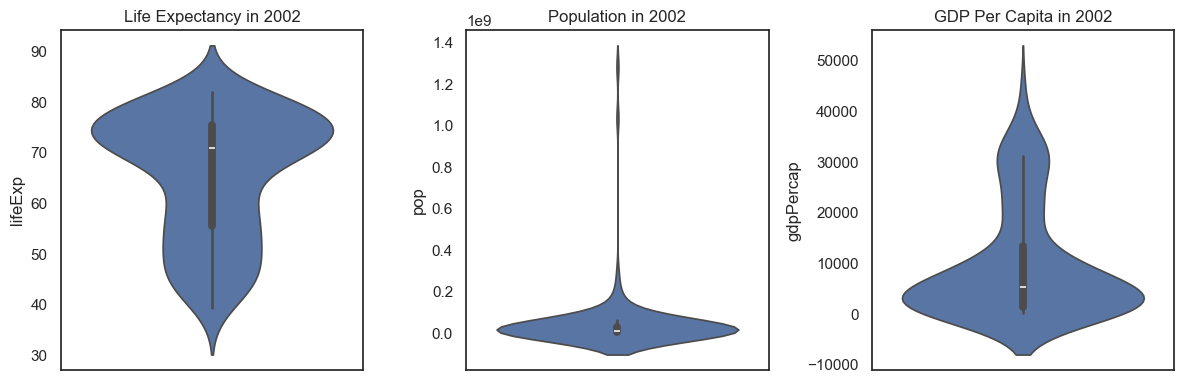

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

_, ax = plt.subplots(1, 3, figsize = (12, 4))
sns.violinplot(data=df2002, y = "lifeExp", ax=ax[0])
ax[0].set_title("Life Expectancy in 2002")

sns.violinplot(data=df2002, y = "pop", ax=ax[1])
ax[1].set_title("Population in 2002")

sns.violinplot(data=df2002, y = "gdpPercap", ax=ax[2])
ax[2].set_title("GDP Per Capita in 2002")
plt.tight_layout()
plt.show()

- One can also look at density and histogram.

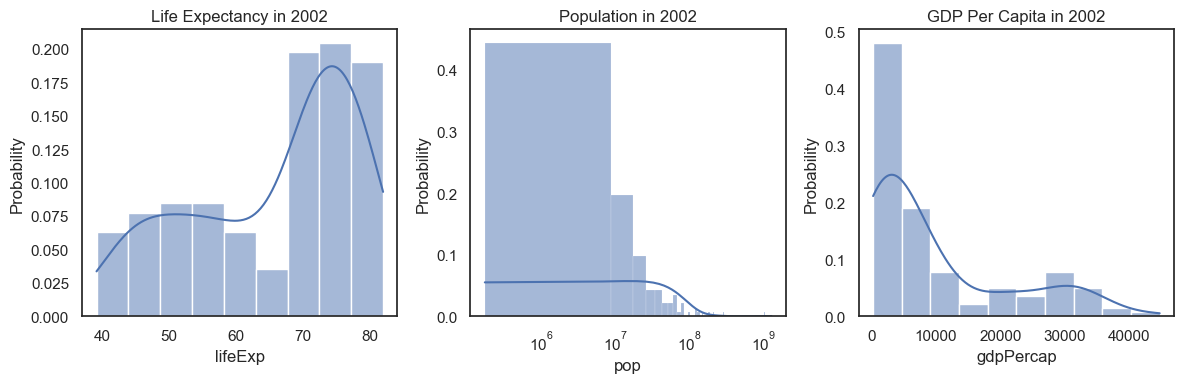

In [53]:
_, ax = plt.subplots(1, 3, figsize = (12, 4))
sns.histplot(data=df2002, x = "lifeExp", ax=ax[0], kde=True, stat="probability")
ax[0].set_title("Life Expectancy in 2002")

sns.histplot(data=df2002, x = "pop", ax=ax[1], kde=True, stat="probability")
ax[1].set_title("Population in 2002")
ax[1].set_xscale("log")

sns.histplot(data=df2002, x = "gdpPercap", ax=ax[2], kde=True, stat="probability")
ax[2].set_title("GDP Per Capita in 2002")
plt.tight_layout()
plt.show()

> Note: both convey the same information.

3. According to the data, in 2002:
- Which country is the richest? 
- Which country is the poorest?
- Which country is the healthiest?
- Which country is the unhealthiest?

In [54]:
print(f"The richest country is {df2002.country[df2002.gdpPercap == np.max(df2002.gdpPercap)].values[0]}")
print(f"The poorest country is {df2002.country[df2002.gdpPercap == np.min(df2002.gdpPercap)].values[0]}")
print(f"The healthiest country is {df2002.country[df2002.lifeExp == np.max(df2002.lifeExp)].values[0]}")
print(f"The unhealthiest country is {df2002.country[df2002.lifeExp == np.min(df2002.lifeExp)].values[0]}")

The richest country is Norway
The poorest country is Congo, Dem. Rep.
The healthiest country is Japan
The unhealthiest country is Zambia


4. Repeat the previous question for the year 1977. Before computing, can you guess which country had the lowest life expectancy around that year?

In [55]:
df2007 = gapminder[gapminder.year == 1977]

print(f"The richest country is {df2007.country[df2007.gdpPercap == np.max(df2007.gdpPercap)].values[0]}")
print(f"The poorest country is {df2007.country[df2007.gdpPercap == np.min(df2007.gdpPercap)].values[0]}")
print(f"The healthiest country is {df2007.country[df2007.lifeExp == np.max(df2007.lifeExp)].values[0]}")
print(f"The unhealthiest country is {df2007.country[df2007.lifeExp == np.min(df2007.lifeExp)].values[0]}")

The richest country is Kuwait
The poorest country is Myanmar
The healthiest country is Iceland
The unhealthiest country is Cambodia


## 2.2. Qualitative variables

Qualitative variables are simpler than quantitative ones, as we primarily focus on the proportion or frequency of each category. In our dataset, the existing qualitative variables are not suitable for analysis because they are repeated each year. Therefore, we will create three new qualitative variables associated with the three quantitative ones by dividing them into three categories each.

In year 2002,

1. Add the following three variables to the `gapminder` dataset by grouping each quantitative variable into $3$ groups.
- Create variable `gdpQual` with three categories: [**"developing"**, **"moderate"**, **"developed"**] using variable `gdpPercap`.
- Create variable `popQual` with three categories: [**"small"**, **"medium"**, **"large"**] using variable `pop`.
- Create variable `lifeExpQual` with three categories: [**"unhealthy"**, **"moderate"**, **"healthy"**] using variable `lifeExp`.

> Hint: you may find `np.histogram` and `pd.cut` function helpful.


In [56]:
import warnings
warnings.filterwarnings('ignore')

bk = np.histogram(df2002['gdpPercap'], 3) # breaks with 3 classes
df2002['gdpQual'] = pd.cut(df2002['gdpPercap'], bins=bk[1], labels=["developing", "moderate", "developed"])
bk = np.histogram(df2002['pop'], 3)
df2002['popQual'] = pd.cut(df2002['pop'], bins=bk[1], labels=["small", "medium", "large"])
bk = np.histogram(df2002['lifeExp'], 3)
df2002['lifeExpQual'] = pd.cut(df2002['lifeExp'], bins=bk[1], labels=["unhealthy", "moderate", "healthy"])

2. Compute the appropriate statistical values and graphically represent the distribution of each newly created qualitative variable.

In [57]:
print("* Distribution of gdpQual:")
df2002[["gdpQual"]].value_counts(normalize=True).to_frame().transpose()

* Distribution of gdpQual:


gdpQual,developing,moderate,developed
proportion,0.758865,0.134752,0.106383


In [58]:
print("* Distribution of popQual:")
df2002[["popQual"]].value_counts(normalize=True).to_frame().transpose()

* Distribution of popQual:


popQual,small,large,medium
proportion,0.985816,0.014184,0.0


In [59]:
print("* Distribution of lifeExpQual:")
df2002[["lifeExpQual"]].value_counts(normalize=True).to_frame().transpose()

* Distribution of lifeExpQual:


lifeExpQual,healthy,unhealthy,moderate
proportion,0.595745,0.219858,0.184397


### Graphical representation

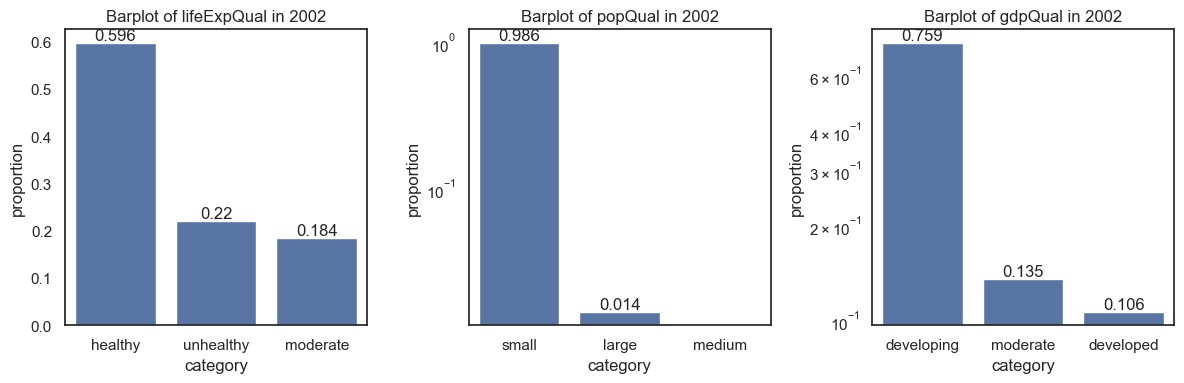

In [60]:
_, ax = plt.subplots(1,3, figsize = (12, 4))

df0 = df2002[["lifeExpQual"]].value_counts(normalize=True).to_frame().round(3)
df0['category'] = [df0.index[i][0] for i in range(3)]
sns.barplot(df0, x = "category", y="proportion", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title("Barplot of lifeExpQual in 2002")

df0 = df2002[["popQual"]].value_counts(normalize=True).to_frame().round(3)
df0['category'] = [df0.index[i][0] for i in range(3)]
sns.barplot(df0, x = "category", y="proportion", ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_title("Barplot of popQual in 2002")
ax[1].set_yscale("log")

df0 = df2002[["gdpQual"]].value_counts(normalize=True).to_frame().round(3)
df0['category'] = [df0.index[i][0] for i in range(3)]
sns.barplot(df0, x = "category", y="proportion", ax=ax[2])
ax[2].bar_label(ax[2].containers[0])
ax[2].set_title("Barplot of gdpQual in 2002")
ax[2].set_yscale("log")

plt.tight_layout()

> As highlighted in the previous step, `pop` and `gdpPercap` are skewed to the right side of the distribution. Therefore, when grouping into classes, only a few countries fall into the above-moderate class. On the other hand, `lifeExp` is less skewed and we obtain less imbalanced classes when grouping into categories.

---------

# 3. Time evolution

`Gapminder` captures global changes from $1952$ to $2007$. It is more insightful to examine how these variables evolve over time.

## 3.1. Evolution of average `lifeExp` of the $5$ continents

1. Create a line plot of `lifeExp` for the five continents from $1952$ to $2007$ using `sns.lineplot`. What observations can you make from the plot?

Text(0.5, 1.0, 'Evolution of life expectancy of the 5 continents')

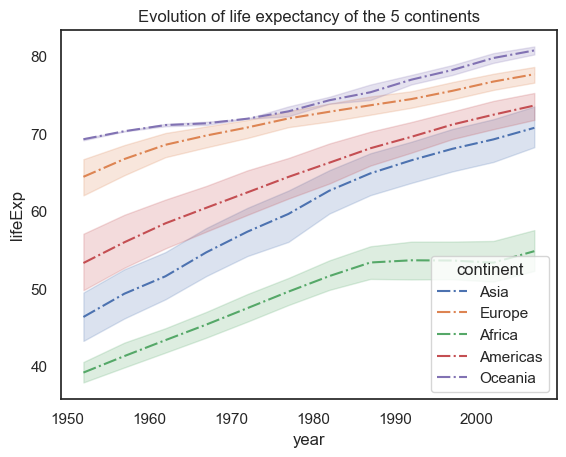

In [61]:
sns.lineplot(data=gapminder, x="year", y="lifeExp", hue="continent", linestyle="-.")
plt.title("Evolution of life expectancy of the 5 continents")

> People across all continents have been getting healthier over the years. Oceania stands out as the healthiest continent, while Africa remains the unhealthiest, with life expectancy growth nearly stable over the past two decades. The graph highlights a positive global trend toward better health, likely driven by advancements in technology and healthcare systems.

2. Repeat the same process with `pop`, and then with `gdpPercap`. Provide your comments for each case.

Text(0.5, 1.0, 'Evolution of GDP per Capita of the 5 continents')

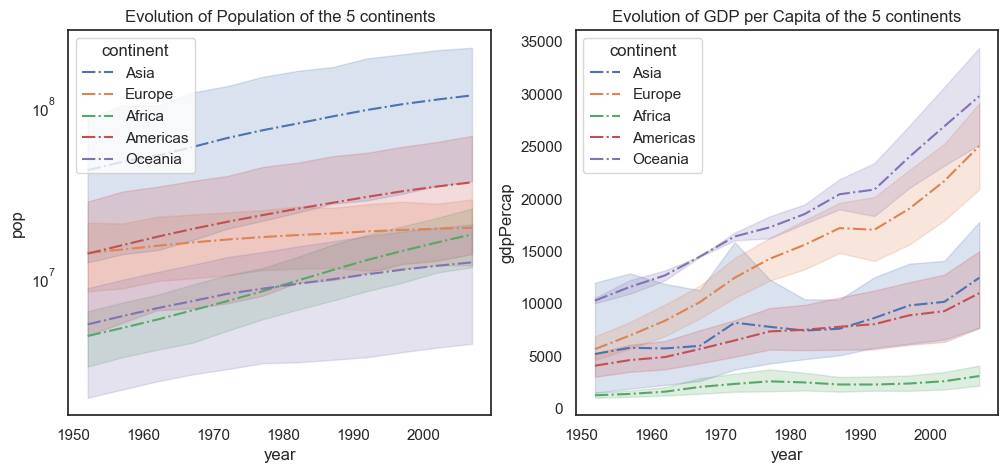

In [62]:
_, ax = plt.subplots(1,2,figsize=(12,5))
sns.lineplot(data=gapminder, x="year", y="pop", hue="continent", linestyle="-.", ax=ax[0])
ax[0].set_title("Evolution of Population of the 5 continents")
ax[0].set_yscale("log")

sns.lineplot(data=gapminder, x="year", y="gdpPercap", hue="continent", linestyle="-.", ax=ax[1])
ax[1].set_title("Evolution of GDP per Capita of the 5 continents")

3. Plot the evolution of the three quantitative variables for **Cambodia**. What do you observe?

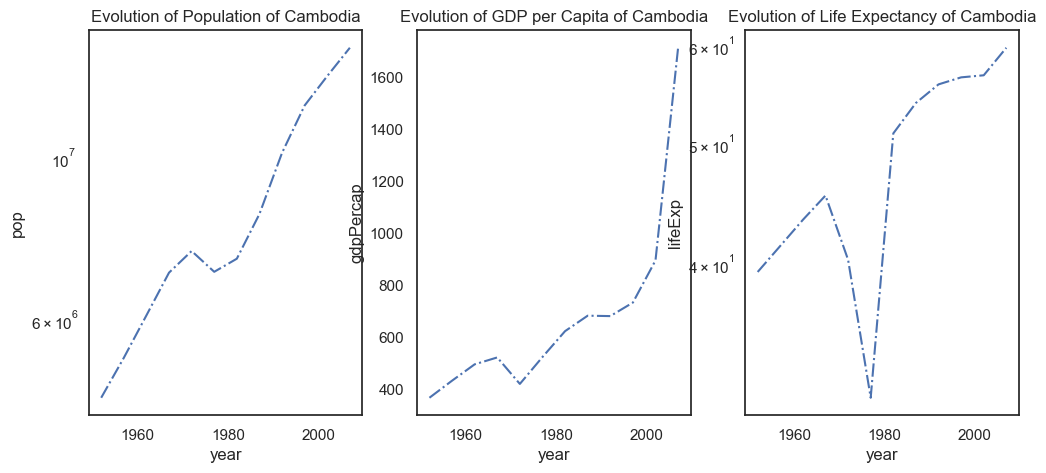

In [63]:
_, ax = plt.subplots(1,3,figsize=(12,5))
sns.lineplot(data=gapminder[gapminder.country == "Cambodia"], x="year", y="pop", linestyle="-.", ax=ax[0])
ax[0].set_title("Evolution of Population of Cambodia")
ax[0].set_yscale("log")

sns.lineplot(data=gapminder[gapminder.country == "Cambodia"], x="year", y="gdpPercap", linestyle="-.", ax=ax[1])
ax[1].set_title("Evolution of GDP per Capita of Cambodia")

sns.lineplot(data=gapminder[gapminder.country == "Cambodia"], x="year", y="lifeExp", linestyle="-.", ax=ax[2])
ax[2].set_title("Evolution of Life Expectancy of Cambodia")
ax[2].set_yscale("log")